In [22]:
from matplotlib import pyplot as pl
%matplotlib notebook
import numpy as np
from sklearn.metrics import mean_squared_error, mean_squared_log_error
from scipy.optimize import minimize
from scipy.ndimage import median_filter

In [33]:
w = np.ones(5)
X = np.random.randn(10000, 5)
y = X.dot(w)
yexp = np.exp(y)

<IPython.core.display.Javascript object>


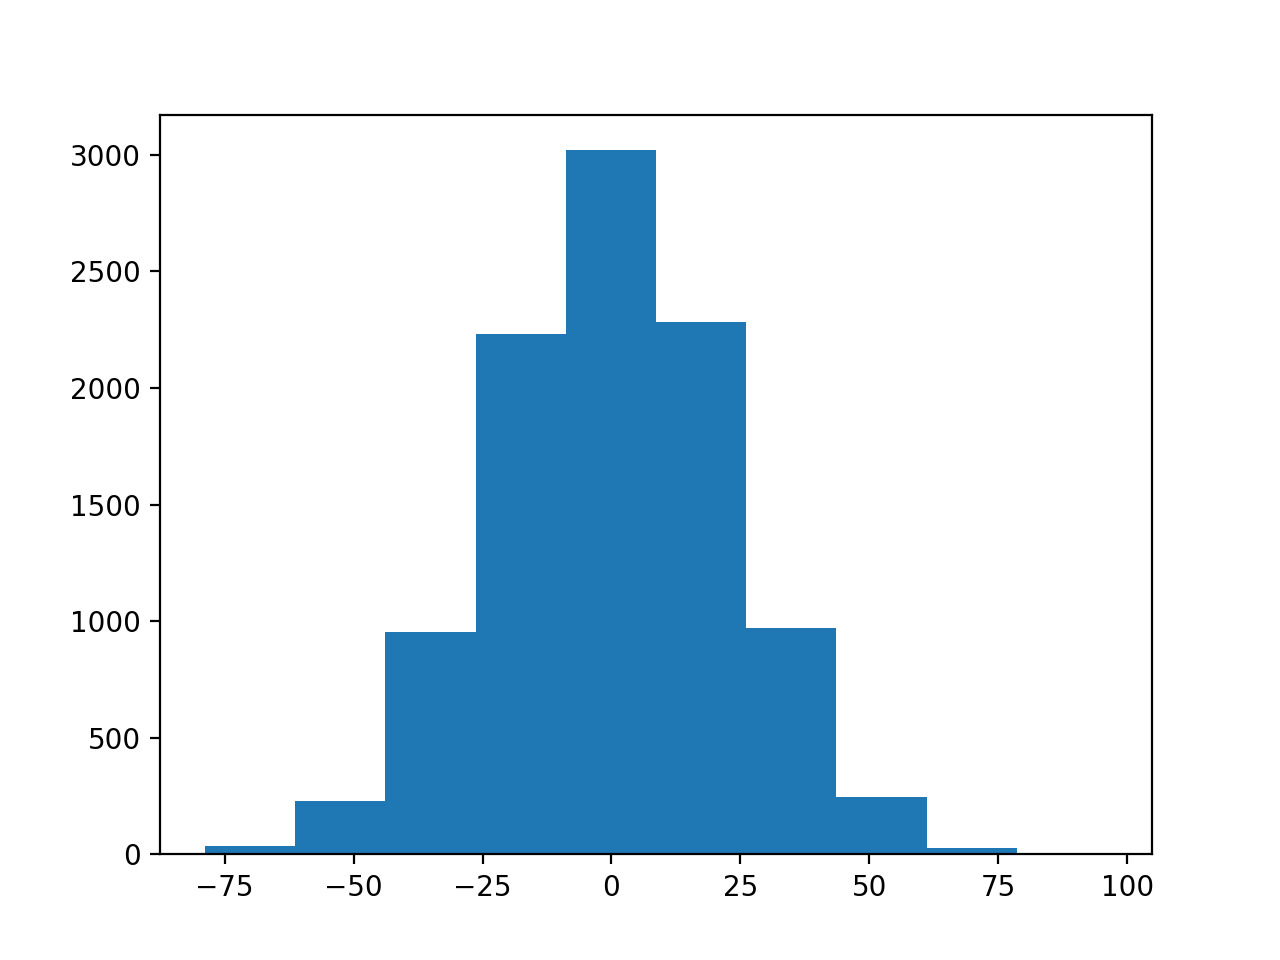

In [13]:
_ = pl.hist(y)

<IPython.core.display.Javascript object>


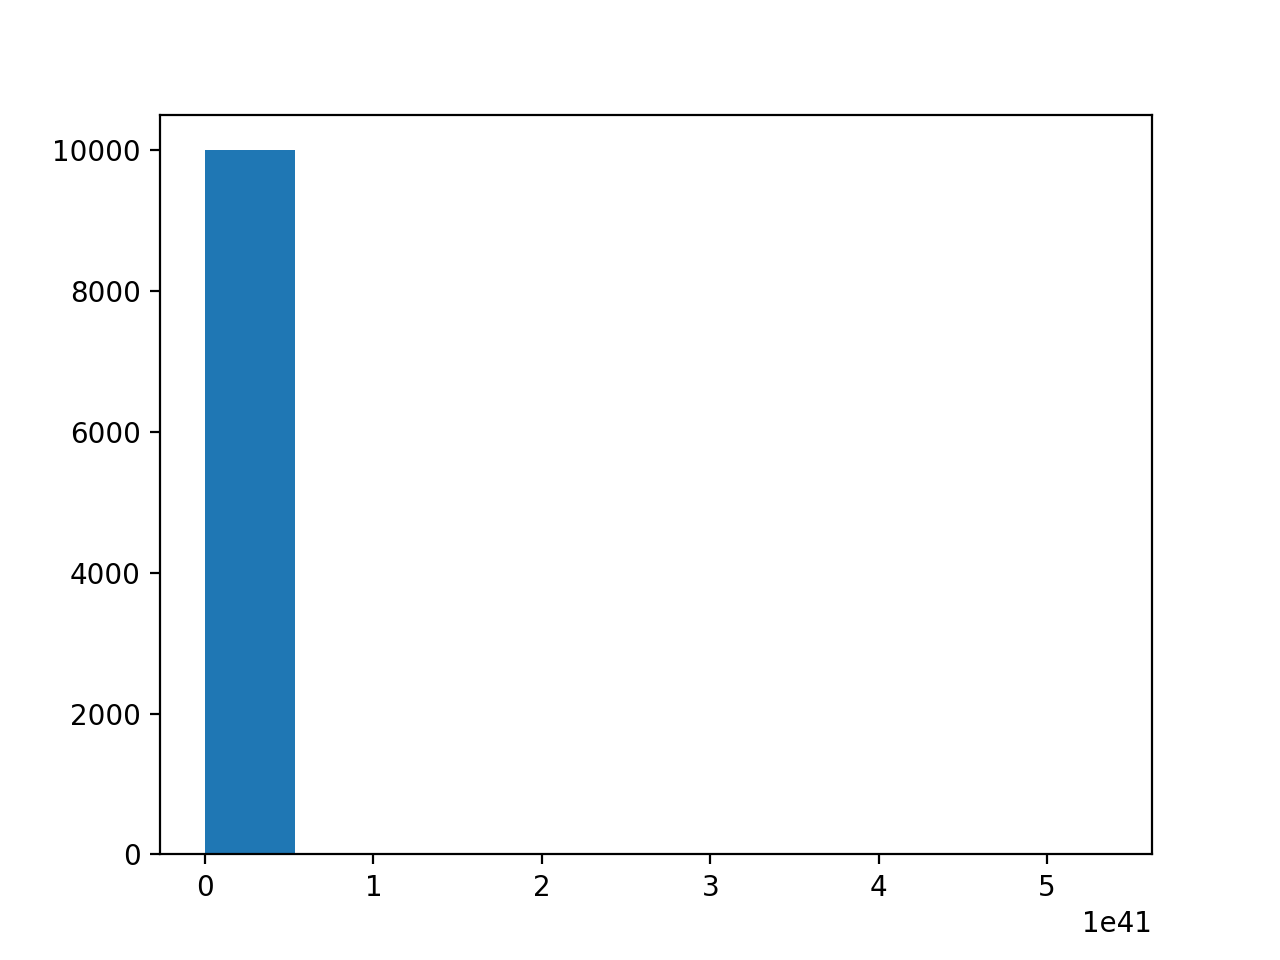

In [14]:
_ = pl.hist(yexp)

In [34]:
x0 = np.zeros(X.shape[1])

In [35]:
mse = lambda x: mean_squared_error(yexp, X.dot(x))
def msle(x, t=1): 
    pred = X.dot(x)+t
    pred[pred<0] = 0
    return mean_squared_log_error(yexp+t, pred)

In [50]:
res_msle10 = minimize(lambda x: msle(x,100), x0, tol=1e-5)

In [37]:
res_mse = minimize(mse, x0, tol=1e-5)

In [46]:
res_msle1 = minimize(lambda x: msle(x,1), x0, tol=1e-5)

In [52]:
res_msle100 = minimize(lambda x: msle(x,100), x0, tol=1e-5)

In [59]:
results = {}
T = [1.0, 10.0, 20.0, 30.0, 70.0, 100.0, 200.0, 500.0]
for t in T:
    results[t] = minimize(lambda x: msle(x, t), x0, tol=1e-5)

<IPython.core.display.Javascript object>


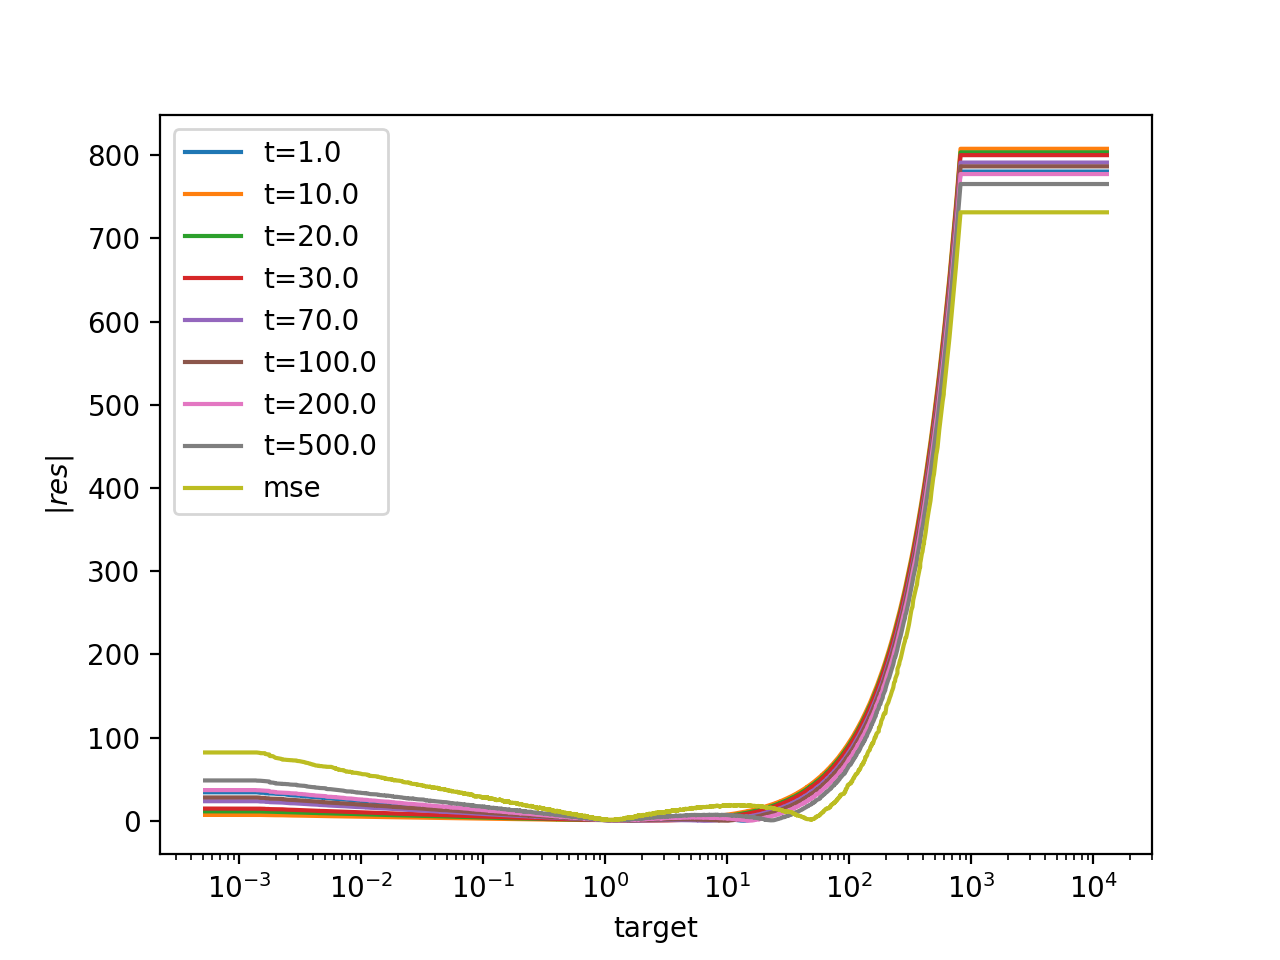

In [60]:
sorted_idx = np.argsort(yexp)
label_sorted = yexp[sorted_idx]
def get_sorted_residuals(results):
    abs_res = np.abs(yexp - X.dot(results['x']))
    return abs_res[sorted_idx]
# colors = sns.color_palette("hls", len(T))
# use median filter to smooth residuals and see the trend.
for t in T:
    pl.plot(label_sorted, median_filter(get_sorted_residuals(results[t]),  size=50), label='t={}'.format(t))
pl.plot(label_sorted, median_filter(get_sorted_residuals(res_mse),  size=50), label='mse')
pl.xscale('log')
pl.xlabel('target')
pl.ylabel(r'$\|res\|$')
pl.legend()

In [58]:
np.log(500)

6.214608098422191